In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pm.__version__

'3.11.2'

## Plotting pdf of continuous distributions

In [2]:
def plot_cont(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    ax.plot(x, np.exp(self.logp(x)).eval())
    return ax

# Assign this distribution to the abstract class Continuous
pm.Continuous.plot = plot_cont

Example use

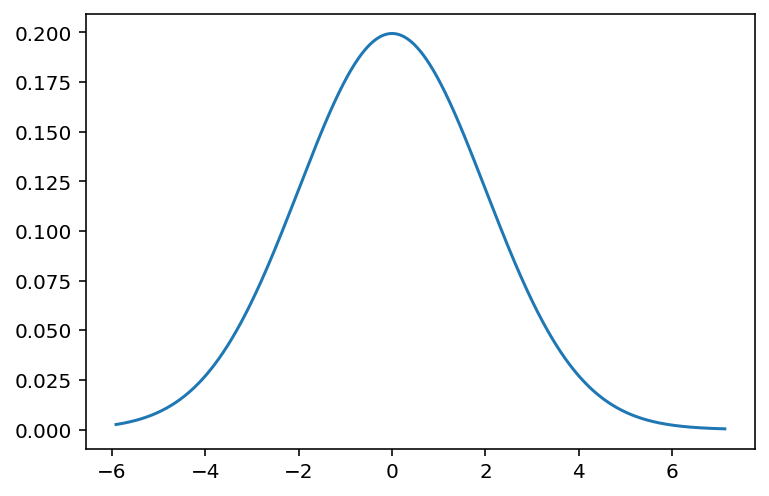

In [3]:
ax = pm.Normal.dist(mu=0, sd=2).plot()

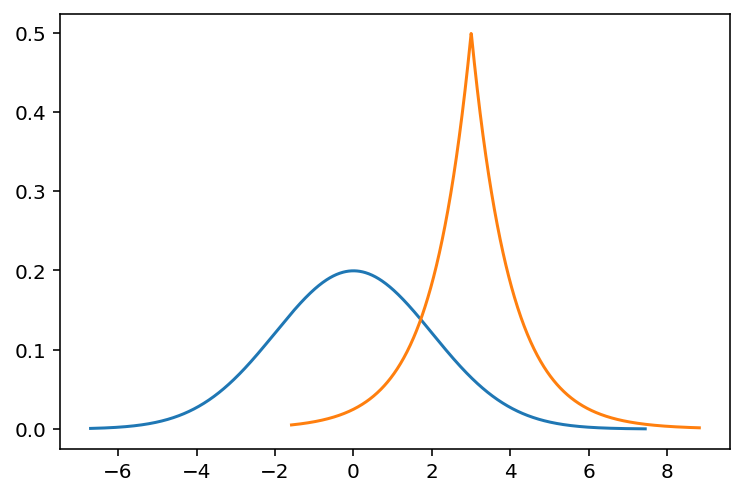

In [4]:
ax = pm.Normal.dist(mu=0, sd=2).plot()
pm.Laplace.dist(mu=3, b=1).plot(ax);

## Plotting pdf of discrete distributions

In [5]:
def plot_disc(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.arange(np.min(samples), np.max(samples)+1)
    plt.plot(x, np.exp(self.logp(x)).eval(), "-o")
    return ax

# add plot method to abstract class Continuous
pm.Discrete.plot = plot_disc

Example use

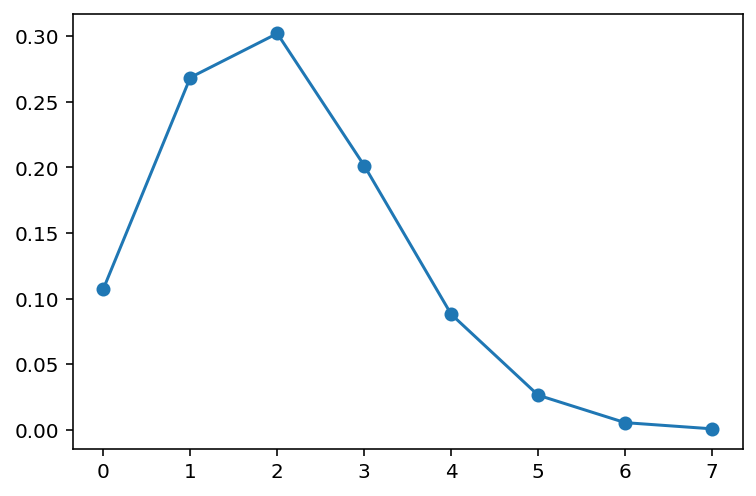

In [6]:
ax = pm.Binomial.dist(n=10, p=0.2).plot()

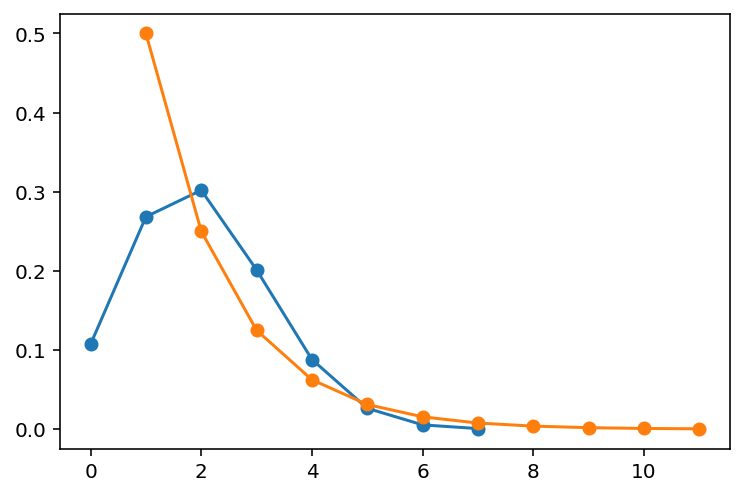

In [7]:
ax = pm.Binomial.dist(n=10, p=0.2).plot()
pm.Geometric.dist(p=0.5).plot(ax);